In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
mydata=pd.read_csv(r"C:\Users\Rads Gupta\Desktop\Machine Learning A-Z\Part 4 - Clustering\Section 24 - K-Means Clustering\Mall_Customers.csv")

In [73]:
mydata.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
mydata.shape

(200, 5)

In [75]:
type(mydata)

pandas.core.frame.DataFrame

In [76]:
x=mydata.iloc[:,[3,4]].values

In [77]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [78]:
#using elbow method to find the optimal number of clusters

In [79]:
from sklearn.cluster import KMeans

In [80]:
wcss=[]

In [81]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [82]:
plt.plot(range(1,11),wcss)

In [83]:
plt.title("The elbow method")

In [84]:
plt.xlabel("Number of clusters")
plt.ylabel('wcss')

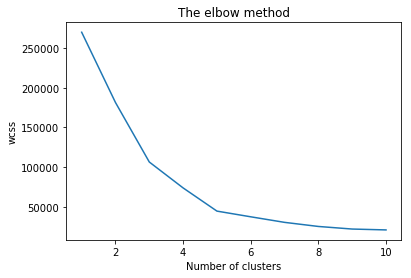

In [85]:
plt.show()

In [86]:
#Applying k-means to the mall dataset

In [87]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [88]:
ykmeans=kmeans.fit_predict(x)

In [89]:
ykmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

In [106]:
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1] , s=100, c='magenta', label='careful')

In [107]:
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1] , s=100, c='red', label='standard')
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1] , s=100, c='blue', label='target')
plt.scatter(x[ykmeans==3,0],x[ykmeans==3,1] , s=100, c='green', label='careless')
plt.scatter(x[ykmeans==4,0],x[ykmeans==4,1] , s=100, c='cyan', label='Sensible')

In [108]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label='Centroids')

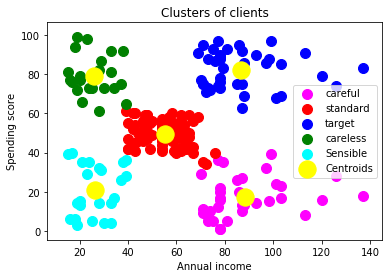

In [109]:
plt.title('Clusters of clients')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()